In [ ]:
#no.of.parameters

Training Model 1
Model trained with parameters: 15958, Train loss: 0.2781003713607788, Test loss: 0.2810151278972626
Training Model 2
Model trained with parameters: 31818, Train loss: 0.2060648500919342, Test loss: 0.2122950702905655
Training Model 3
Model trained with parameters: 47678, Train loss: 0.24637776613235474, Test loss: 0.2525031566619873
Training Model 4
Model trained with parameters: 63538, Train loss: 0.17524951696395874, Test loss: 0.1784433126449585
Training Model 5
Model trained with parameters: 79398, Train loss: 0.16709481179714203, Test loss: 0.18114623427391052
Training Model 6
Model trained with parameters: 95258, Train loss: 0.1419110745191574, Test loss: 0.15926584601402283
Training Model 7
Model trained with parameters: 111118, Train loss: 0.12906010448932648, Test loss: 0.13903354108333588
Training Model 8
Model trained with parameters: 126978, Train loss: 0.11878907680511475, Test loss: 0.13097713887691498
Training Model 9
Model trained with parameters: 14283

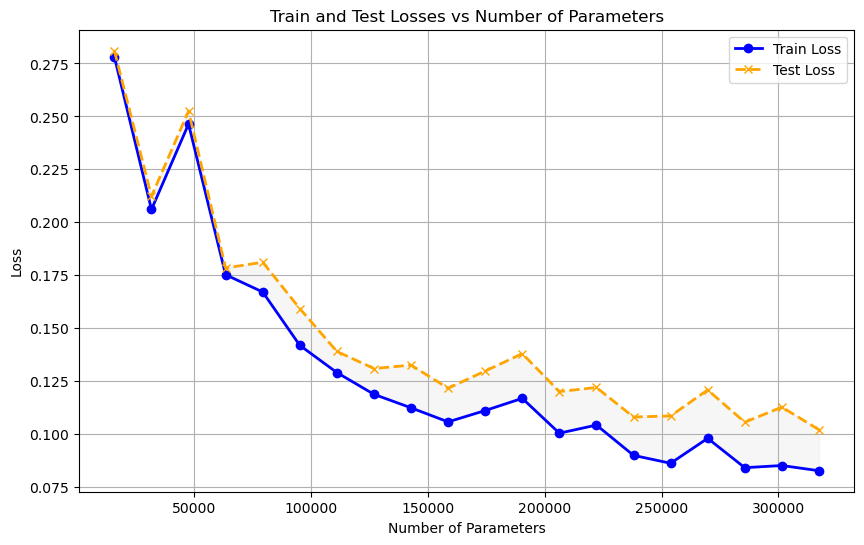

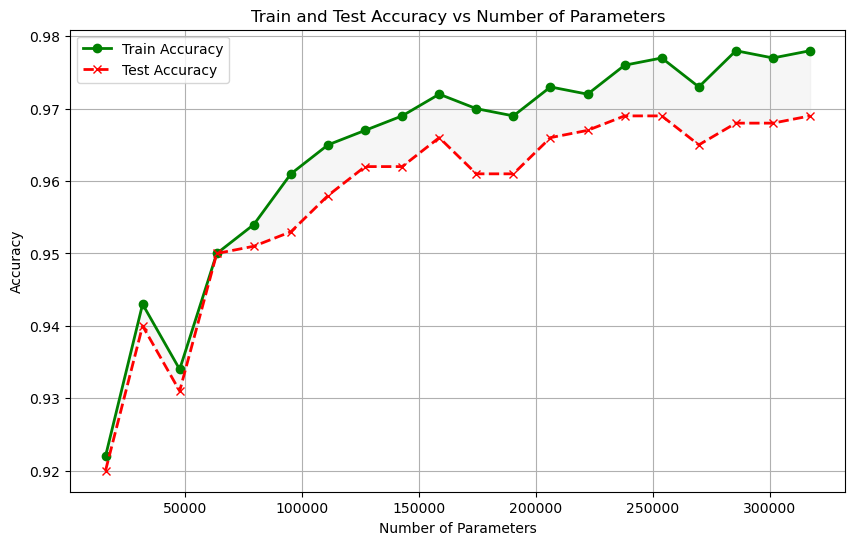

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

def load_data(train_size, test_size):
    trainset = datasets.MNIST('data', train=True, download=False,
                              transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))
                              ]))
    train_data = torch.utils.data.DataLoader(trainset, batch_size=train_size, shuffle=True)

    testset = datasets.MNIST('data', train=False, download=False,
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))
    test_data = torch.utils.data.DataLoader(testset, batch_size=test_size, shuffle=True)

    return train_data, test_data

# Model Definitions (Model 1 to Model 20)
class Model(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# Initialize optimizer
def initiliase_optimizer(model):
    return optim.Adam(model.parameters(), lr=0.0001)

# Training function
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data.view(-1, 784))
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

# Calculate performance
def calculate_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct / total, 3)

# Training function for multiple models
def train_models(model, optimizer, train_data, test_data):
    total_train_loss = 0
    for epoch in range(1, 9):
        train(model, optimizer, train_data)
    train_loss, train_acc = calculate_op_diff(model, train_data)
    test_loss, test_acc = calculate_op_diff(model, test_data)

    train_loss_arr.append(train_loss.item())
    test_loss_arr.append(test_loss.item())
    train_accuracy_arr.append(train_acc)
    test_accuracy_arr.append(test_acc)
    param_arr.append(sum(p.numel() for p in model.parameters()))

    print(f"Model trained with parameters: {sum(p.numel() for p in model.parameters())}, Train loss: {train_loss}, Test loss: {test_loss}")

# Prepare data
train_batch_size = 50
test_batch_size = 100
train_data, test_data = load_data(train_batch_size, test_batch_size)

# Initialize arrays for tracking performance
param_arr = []
train_loss_arr = []
test_loss_arr = []
train_accuracy_arr = []
test_accuracy_arr = []

# Train 20 models with different hidden layer sizes
for i in range(1, 21):
    hidden_size1 = 20 * i
    hidden_size2 = 8
    model = Model(784, hidden_size1, hidden_size2, 10)
    optimizer = initiliase_optimizer(model)
    print(f"Training Model {i}")
    train_models(model, optimizer, train_data, test_data)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_arr, train_loss_arr, color="blue", label='Train Loss', marker='o', linestyle='-', linewidth=2)
plt.plot(param_arr, test_loss_arr, color="orange", label='Test Loss', marker='x', linestyle='--', linewidth=2)
plt.fill_between(param_arr, train_loss_arr, test_loss_arr, color="lightgray", alpha=0.2)
plt.title("Train and Test Losses vs Number of Parameters")
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(param_arr, train_accuracy_arr, color="green", label='Train Accuracy', marker='o', linestyle='-', linewidth=2)
plt.plot(param_arr, test_accuracy_arr, color="red", label='Test Accuracy', marker='x', linestyle='--', linewidth=2)
plt.fill_between(param_arr, train_accuracy_arr, test_accuracy_arr, color="lightgray", alpha=0.2)
plt.title("Train and Test Accuracy vs Number of Parameters")
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
